# Imports

In [ ]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import sys
import numpy as np
from google.colab import drive
import random
import sklearn.metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit, GridSearchCV
from sklearn import svm
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import *

# Preprocessing

## Data Loading

In [ ]:
def load_data(csv_filepath):
    '''
    Load data from a csv file.

    :param csv_filepath: path of the .csv file containing the data to load/extract

    :return X: array of values associated with the inputs of the data contained in the .csv file
    :return Y: array of values associated with the labels of the data contained in the .csv file or None if the file does not contain labels
    '''

    data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset1.csv')

    # Headers' list:
    headers = data.columns # 'x' for inputs, 'y' for labels

    # Extract DataFrames based on the headers:
    x_data = data[headers[0]]

    # Convert an array-like string (e.g., '[0.02, 1.34\n, 2.12, 3.23\n]')
    # into an array of floats (e.g., [0.02, 1.34, 2.12, 3.23]):
    X_data = [[float(feature) for feature in feature_vec.replace('[', '').replace(']', '').split()] for feature_vec in x_data]

    # convert data into numpy arrays
    X = np.array(X_data)

    if len(headers)>1:
        Y_data = data[headers[1]]
        Y = np.array(Y_data)
    else:
        Y = None

    return X, Y



if len(sys.argv)>1:
    X, Y = load_data(sys.argv[1])
    print("X: "+str(X.shape))
    if Y is not None:
        print("Y: "+str(Y.shape))

X_df = pd.DataFrame(X)

print("\n\n\n\n")
Y_df = pd.DataFrame(Y)

X: (50000, 100)
Y: (50000,)







In [ ]:
X_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.994210,0.339437,0.0,0.481943,4.104690,0.0,0.000000,1.003648,0.0,1.353046,...,2.507152,0.000000,3.588297,0.000000,0.000000,0.156997,3.890810,0.000000,0.000000,0.0
1,0.000000,1.415991,0.0,2.885742,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.211144,0.000000,3.315986,0.965814,3.044368,3.456200,0.000000,9.485678,0.028253,0.0
2,0.000000,1.320484,0.0,2.814479,0.832429,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,3.118805,0.399551,2.272334,2.339240,0.000000,7.692220,0.000000,0.0
3,0.459657,1.202142,0.0,0.000000,2.281308,0.0,0.000000,1.488012,0.0,0.808162,...,3.554601,0.996622,2.015630,0.000000,2.926057,0.000000,1.943083,3.075836,0.000000,0.0
4,0.023708,0.000000,0.0,1.006909,0.000000,0.0,0.000000,1.312168,0.0,1.016113,...,1.661898,0.000000,10.896092,1.081312,6.260812,4.976063,6.542039,1.703158,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.301463,0.824014,0.0,2.165370,1.758735,0.0,1.175711,2.813266,0.0,0.245017,...,0.842096,0.994820,0.298871,0.000000,4.337564,0.000000,1.180017,1.114116,0.000000,0.0
49996,1.403376,0.000000,0.0,1.105879,3.196880,0.0,0.000000,1.406597,0.0,1.633945,...,2.247534,0.000000,2.840954,0.144968,0.347157,0.124675,3.287519,0.000000,0.000000,0.0
49997,0.000000,2.519521,0.0,1.896649,0.552362,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,4.333379,0.601905,1.792985,2.013445,0.000000,8.207214,0.000000,0.0
49998,0.435667,0.000000,0.0,0.782352,0.000000,0.0,0.000000,1.667307,0.0,0.999989,...,1.375717,0.000000,10.807025,0.966152,5.104793,4.538359,6.863098,1.624840,0.000000,0.0


In [ ]:
Y_df

,0
0,6
1,9
2,9
3,4
4,1
...,...
49995,2
49996,6
49997,9
49998,1


## Information and Statistics

In [ ]:
print("Infos on the dataset:")
print(X_df.info())

print("\n\n\n\n")

print(Y_df.info())

print("\n\n\n\n\n")

# to check if there is any missing value in the columns
print("X_df.isnull():")
print(X_df.isnull().sum())
print("Y_df.isnull():")
print(Y_df.isnull().sum())

print("\n\n\n\n\n")

print("df.describe():")
print(X_df.describe())
print(Y_df.describe())

print("\n\n\n\n\n\n")


Infos on the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 100 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       50000 non-null  float64
 1   1       50000 non-null  float64
 2   2       50000 non-null  float64
 3   3       50000 non-null  float64
 4   4       50000 non-null  float64
 5   5       50000 non-null  float64
 6   6       50000 non-null  float64
 7   7       50000 non-null  float64
 8   8       50000 non-null  float64
 9   9       50000 non-null  float64
 10  10      50000 non-null  float64
 11  11      50000 non-null  float64
 12  12      50000 non-null  float64
 13  13      50000 non-null  float64
 14  14      50000 non-null  float64
 15  15      50000 non-null  float64
 16  16      50000 non-null  float64
 17  17      50000 non-null  float64
 18  18      50000 non-null  float64
 19  19      50000 non-null  float64
 20  20      50000 non-null  float64
 21  21      5000

## Correlation

In [ ]:
correlation_matrix = X_df.corr()
print(correlation_matrix)

plt.figure(figsize=(20, 16))

sns.heatmap(correlation_matrix, cmap='coolwarm')

plt.title('Correlation Matrix', fontsize=30)
plt.show()

In [ ]:
# rename attribute name from '0' to n (n = 100 for dataset 1, n = 1000 for dataset 2)

n = X_df.shape[1]
print(n)

new_Y = Y_df.rename(columns={0: n})

100


## Label Distribution

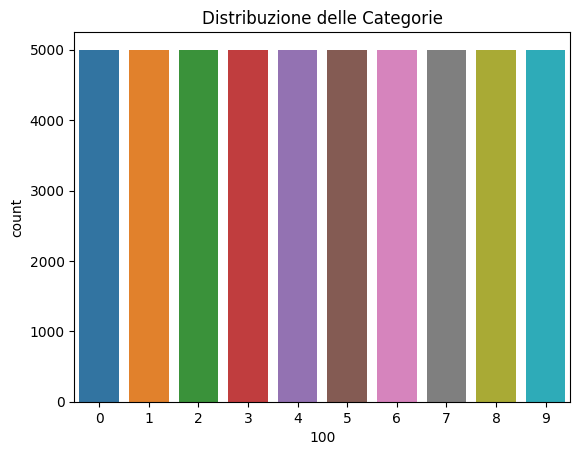

In [ ]:
df = pd.concat([X_df, new_Y], axis=1) # using df just to visualize the label distribution
sns.countplot(x=n, data=df)
plt.title('Distribuzione delle Categorie')
plt.show()

## Standardization

In [ ]:
scaler_X = StandardScaler()
X_df_standardized = pd.DataFrame(scaler_X.fit_transform(X_df), columns=X_df.columns)

scaler_Y = StandardScaler()
Y_df_standardized = pd.DataFrame(scaler_Y.fit_transform(Y_df), columns=Y_df.columns)

## Feature Selection

### Remove constant features

In [ ]:
### zero variance = constant
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_df)

In [ ]:
var_thres.get_support()

In [ ]:
X_df.columns[var_thres.get_support()]

In [ ]:
constant_columns = [column for column in X_df.columns
                    if column not in X_df.columns[var_thres.get_support()]]

print(len(constant_columns))

In [ ]:
for feature in constant_columns:
     print(feature)

In [ ]:
X_df = X_df.drop(constant_columns,axis=1)

### Remove highly (positively) correlated features

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] > threshold: # we are not using abs(), since we just want to inspect positive correlation
                print("column " + str(i) + " is highly (positively) correlated with " + str(j))
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(X_df, 0.5)
len(set(corr_features))

In [ ]:
corr_features

In [ ]:
X_df = X_df.drop(corr_features,axis=1)

# Methods and Algorithms

## Choice of the Model

In [ ]:
chosen_model = 'SVC'
# chosen_model = 'RandomForest'
# chosen_model = 'GaussianNB'

### SVM
Since the SVM accuracy on the model is high we can deduce

1. Linear Separability

2. Since the dataset is balanced, we can be sure that SVm is not just predicting the classe maggioritaria, but we can however use other matricss such as the ones in the confusion matrix to get a more broad view on the model

3. we should explore more SVM parameter

In [ ]:
if chosen_model == 'SVC':
  print("this is the chosen model")

  param_grid = {'C': [0.1, 1, 100],
                  'kernel': ['linear', 'rbf'],
                  'gamma': ['scale', 'auto']}


  model = SVC(kernel='linear')

this is the chosen model


### Random Forest

In [ ]:
if chosen_model == 'RandomForest':
  print("this is the chosen model")

  param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
  }

  model = RandomForestClassifier(max_depth=2, random_state=0)

this is the chosen model


### Gaussian NB

In [ ]:
if chosen_model == 'GaussianNB':
  print("this is the chosen model")
  model = GaussianNB()

this is the chosen model


## Training Phase

In [ ]:
X_df.shape

(50000, 100)

In [ ]:
scoring_metrics = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

k = 5

results = {}

X_df.shape

for metric_name, scorer in scoring_metrics.items():
    scores = cross_val_score(model, X_df, np.ravel(Y_df), cv=k, scoring=scorer)
    results[metric_name] = scores

In [ ]:
# FOR HYPERTUNING

# Y_ravellato = np.ravel(Y_df)  # Se Y è un DataFrame pandas

# k = 5

# grid_search_svm = GridSearchCV(model, param_grid, cv=k, verbose=3)

# # Fit the model to the data
# grid_search_svm.fit(X_df, Y_ravellato)

# # Get the best parameters
# best_params_svm = grid_search_svm.best_params_

# # Print the accuracy for each set of hyperparameters
# results_svm = grid_search_svm.cv_results_
# for mean_score, params in zip(results_svm["mean_test_score"], results_svm["params"]):
#     print("Accuracy: {:.4f} for {}".format(mean_score, params))

### Accuracy, Precision, Recall, F1-Score

In [ ]:
for metric_name, scores in results.items():
    #print(f"{metric_name} scores:", scores)
    print(f"Mean {metric_name}: {scores.mean()}")
    #print("\n")

Mean accuracy: 0.98734
Mean precision: 0.9873537196115386
Mean recall: 0.98734
Mean f1: 0.9873407644554959
